In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

import random

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [36]:
file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]

df.to_csv('file.csv', encoding="UTF-8") 
df

дата,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты
2019-01-01 00:00:00,940054.0,358995.0,359975.0,324093.0,396797.0
2019-02-01 00:00:00,934602.0,373480.0,394487.0,293906.0,369341.0
2019-03-01 00:00:00,1119164.0,448113.0,424394.0,328754.0,423316.0
2019-04-01 00:00:00,1153440.0,421184.0,416330.0,349420.0,392853.0
2019-05-01 00:00:00,1018421.0,439188.0,438876.0,365331.0,406099.0
2019-06-01 00:00:00,971184.0,476841.0,460116.0,368586.0,407960.0
2019-07-01 00:00:00,1104764.0,498014.0,492318.0,403504.0,406910.0
2019-08-01 00:00:00,1089044.0,478482.0,480080.0,365178.0,425611.0
2019-09-01 00:00:00,1013004.0,457305.0,474989.0,352607.0,391574.0
2019-10-01 00:00:00,1081420.0,474592.0,495538.0,370667.0,434811.0


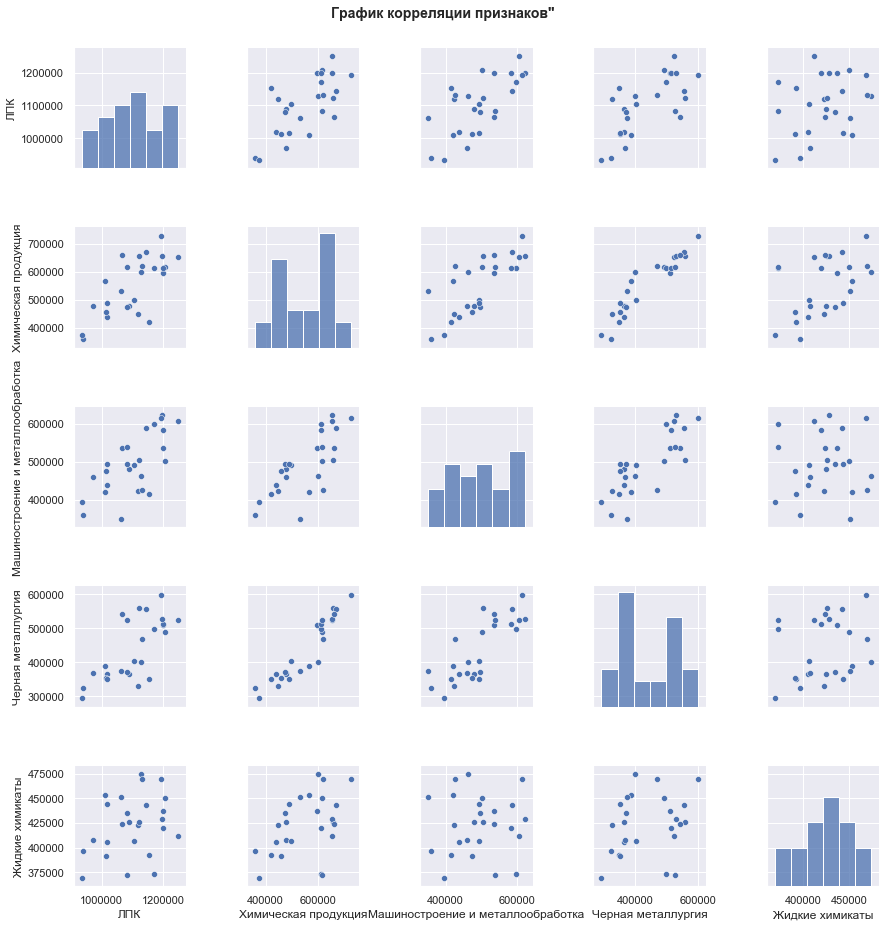

In [5]:
# print ('График №1 "Парные отношения признаков и истинных ответов"')
sns_plot = sns.pairplot(df)
sns_plot.fig.suptitle('График корреляции признаков"', 
                      y = 1.03, fontsize=14, fontweight='bold')
plt.show()

# сохраним график в файл
sns_plot.savefig('graph_1.png')

In [11]:
# инициируем таблицу ошбок среднеквадратичных отклонений
table_errors_test = pd.DataFrame(index = ['MSE_test'])

# напишем функцию определения среднеквадратичной ошибки
def error(x_train, x_test, y_train, y_test):
    # инициируем модель линейной регрессии
    model = LinearRegression()
    # обучим модель на обучающей выборке
    model_fit = model.fit(x_train,y_train)
    # сформируем вектор прогнозных значений
    y_pred = model_fit.predict(x_test)
    # определим среднеквадратичную шибку
    error = round(mean_squared_error(y_test, y_pred),3)
    return error

# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# проведем центрирование данных (функция нормирования отключена)
scaler = StandardScaler(with_mean = True, with_std = False)
scaler = scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# инициируем модель PCA с 4 компонентами
model_pca = PCA(n_components = 4)
# обучим модель на обучающей выборке
model_pca.fit(X_train_norm)
# преобразуем данные обучающей выборки
Z_train_norm = model_pca.transform(X_train_norm)
# преобразуем данные тестовой выборки
Z_test_norm = model_pca.transform(X_test_norm)

# сформируем в pandas таблицу оценок качества модели линейной регрессии в зависимости от используемых признаков
table_errors_test['Все признаки'] = error(X_train_norm, X_test_norm, y_train, y_test)
table_errors_test['3-и признака'] = error(X_train_norm[:,0:4], X_test_norm[:,0:4],y_train, y_test)
table_errors_test['Длина + Диаметр'] = error(X_train_norm[:,0:3], X_test_norm[:,0:3],y_train, y_test)
table_errors_test['Длина'] = error(X_train_norm[:,1].reshape(-1,1), X_test_norm[:,0].reshape(-1,1),
                                   y_train, y_test)
table_errors_test['Диаметр'] = error(X_train_norm[:,2].reshape(-1,1), X_test_norm[:,2].reshape(-1,1), 
                                     y_train, y_test)
table_errors_test['Все компоненты'] = error(Z_train_norm, Z_test_norm, y_train, y_test)
table_errors_test['Три компоненты'] = error(Z_train_norm[:,0:4], Z_test_norm[:,0:4], y_train, y_test)
table_errors_test['Две компоненты'] = error(Z_train_norm[:,0:3], Z_test_norm[:,0:3], y_train, y_test)
table_errors_test['Вторая компонента'] = error(Z_train_norm[:,1].reshape(-1,1), 
                                               Z_test_norm[:,1].reshape(-1,1), 
                                               y_train, y_test)
table_errors_test['Первая компонента'] = error(Z_train_norm[:,0].reshape(-1,1), 
                                               Z_test_norm[:,0].reshape(-1,1), 
                                               y_train, y_test)
table_errors_test

,Все признаки,3-и признака,Длина + Диаметр,Длина,Диаметр,Все компоненты,Три компоненты,Две компоненты,Вторая компонента,Первая компонента
MSE_test,0.332,0.332,0.345,3.084,6.714,0.332,0.332,0.332,6.923,0.578


In [26]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [27]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)
# y_train = np.array(y_train)

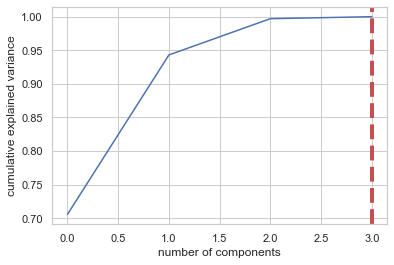

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.705687,0.705687
1,0.943069,0.237381
2,0.997052,0.053983
3,1.000000,0.002948


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=4)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=3, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [29]:
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [30]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3
0,-0.574466,0.183887,0.375946,-0.703448
1,-0.490748,-0.465168,-0.728459,-0.110146
2,-0.554454,-0.291829,0.465343,0.625198
3,-0.348908,0.815254,-0.333868,0.319617
